In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dados_vendas = {
    'mes': ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
    'vendas': [2000, 2200, 2300, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300]
}

In [4]:
df_vendas = pd.DataFrame(dados_vendas)

In [33]:
df_vendas

,mes,vendas
0,1,2000
1,2,2200
2,3,2300
3,4,2500
4,5,2600
5,6,2700
6,7,2800
7,8,2900
8,9,3000
9,10,3100


In [10]:
month_names = {'Janeiro': 1, 'Fevereiro': 2, 'Março':3, 'Abril':4, 'Maio':5, 'Junho':6, 'Julho':7, 'Agosto':8, 'Setembro':9, 'Outubro':10, 'Novembro':11, 'Dezembro':12,} 

In [12]:
df_vendas.mes = df_vendas.mes.map(month_names)

In [6]:
# Importar bibliotecas do sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [17]:
#Modelo
X = pd.DataFrame(df_vendas['mes'])
y = df_vendas['vendas']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=51)

In [19]:
model_1 = LinearRegression().fit(X_train, y_train)

In [20]:
# Gerar Predição com base no modelo para o conjunto de testes
y_pred = model_1.predict(X_test)

In [22]:
model_1.coef_

array([114.16666667])

In [23]:
model_1.intercept_

np.float64(1963.3333333333333)

In [24]:
#Com os dados de treino o resultado foi muito bom
model_1.score(X_train, y_train)

0.990709949854843

In [25]:
#Com os dados de teste o resultado foi muito bom também.
model_1.score(X_test, y_test)

0.9631440781440782

In [26]:
# MAE (Mean Absolut Error)
mean_absolute_error(y_test, y_pred)
# Porém o MAE foi um resultado não tão bom.

np.float64(36.66666666666663)

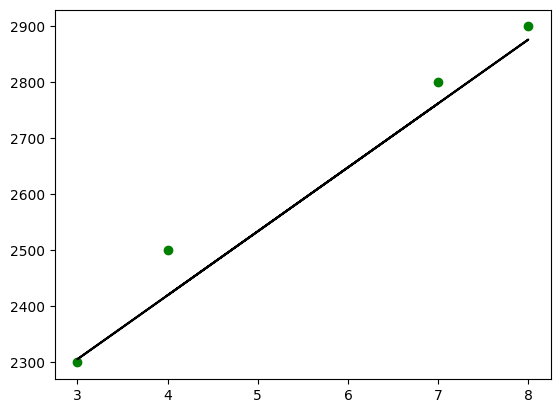

In [30]:
# Como é uma regressão simples, é possível mostrar um plot.
# Mostrar como a reta foi calculada
plt.scatter(X_test, y_test, color="g")
plt.plot(X_test, y_pred, color='k')

In [45]:
previsao_dezembro = model_1.predict(pd.DataFrame(df_vendas[df_vendas.mes == 12].mes))  

In [46]:
print(f"Vendas para Dezembro: {round(previsao_dezembro[0], 2)}")

Previsão de vendas para Dezembro: 3333.33


<BarContainer object of 12 artists>

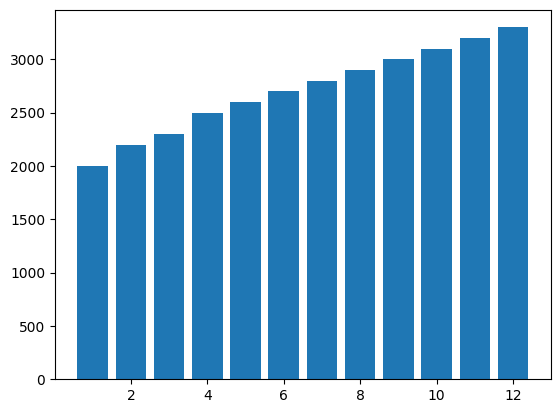

In [68]:
# Histograma de todas as variáveis
plt.bar(df_vendas['mes'], df_vendas['vendas'])

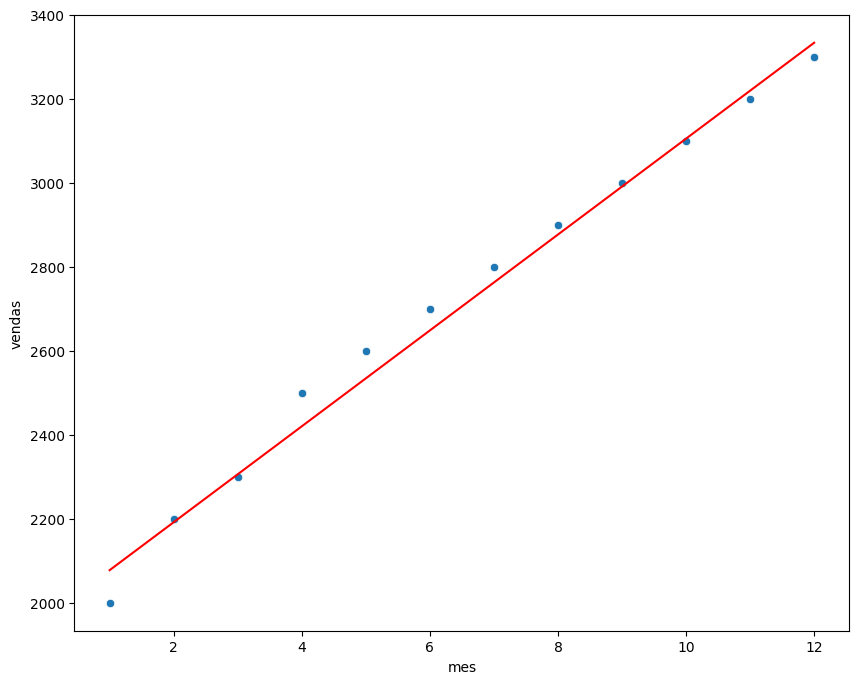

In [52]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='mes', y='vendas', data=df_vendas)
plt.plot(df_vendas['mes'], model_1.predict(df_vendas[['mes']]), color='red')